<a href="https://colab.research.google.com/github/norayehia/TEXT-Classfication-svm-textblob/blob/main/preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**In this example, polarity represents the sentiment polarity, where a positive value indicates a positive sentiment, a negative value indicates a negative sentiment, and 0 indicates a neutral sentiment. Subjectivity is a measure of how subjective the text is, with 0 being very objective and 1 being very subjective.**

In [ ]:
# Import data processing modules

import pandas as pd
import numpy as np

In [ ]:
# Import sci-kit learn models for classification

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import jaccard_score, accuracy_score, f1_score, classification_report
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.sentiment.util import *
from textblob import TextBlob
from nltk import tokenize

In [ ]:


import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize
from nltk import pos_tag
nltk.download('stopwords')
from nltk.corpus import stopwords
nltk.download('wordnet')
from nltk.corpus import wordnet


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [ ]:
#df = pd.read_csv("/content/drive/MyDrive/help/research/aireserchnlp/chatgpt/chdata/file.csv")

In [ ]:
df1= pd.read_csv('/content/drive/MyDrive/help/workong remote/data:run:py/datasets/drugsComTrain_raw.csv')

In [ ]:
df1.head()

,uniqueID,drugName,condition,review,rating,date,usefulCount
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9,20-May-12,27
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8,27-Apr-10,192
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5,14-Dec-09,17
3,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8,3-Nov-15,10
4,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9,27-Nov-16,37


In [ ]:
df2= pd.read_csv('/content/drive/MyDrive/help/workong remote/data:run:py/datasets/drugsComTest_raw.csv')

In [ ]:
df2.head()

,uniqueID,drugName,condition,review,rating,date,usefulCount
0,163740,Mirtazapine,Depression,"""I&#039;ve tried a few antidepressants over th...",10,28-Feb-12,22
1,206473,Mesalamine,"Crohn's Disease, Maintenance","""My son has Crohn&#039;s disease and has done ...",8,17-May-09,17
2,159672,Bactrim,Urinary Tract Infection,"""Quick reduction of symptoms""",9,29-Sep-17,3
3,39293,Contrave,Weight Loss,"""Contrave combines drugs that were used for al...",9,5-Mar-17,35
4,97768,Cyclafem 1 / 35,Birth Control,"""I have been on this birth control for one cyc...",9,22-Oct-15,4


In [ ]:
df1.shape

(161297, 7)

In [ ]:
df2.shape

(53766, 7)

https://www.kaggle.com/code/srinishaaprabhakaran/drugs-sentiment-analysis

In [ ]:
df = [df1,df2]
df = pd.concat(df,ignore_index=True)
df.shape

(215063, 7)

## Data Preprocessing

In [ ]:
df.head()

,uniqueID,drugName,condition,review,rating,date,usefulCount
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9,20-May-12,27
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8,27-Apr-10,192
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5,14-Dec-09,17
3,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8,3-Nov-15,10
4,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9,27-Nov-16,37


Cleaning the text


*Tokenization
*Enrichment – POS tagging
*Stopwords removal
*Obtaining the stem words




In [ ]:
# Define a function to clean the text
def clean(text):
# Removes all special characters and numericals leaving the alphabets
    text = re.sub('[^A-Za-z]+', ' ', text)
    return text

# Cleaning the text in the review column
df['Cleaned Reviews'] = df['review'].apply(clean)
df.head()

,uniqueID,drugName,condition,review,rating,date,usefulCount,Cleaned Reviews
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9,20-May-12,27,It has no side effect I take it in combinatio...
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8,27-Apr-10,192,My son is halfway through his fourth week of ...
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5,14-Dec-09,17,I used to take another oral contraceptive whi...
3,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8,3-Nov-15,10,This is my first time using any form of birth...
4,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9,27-Nov-16,37,Suboxone has completely turned my life around...


Code for Steps 2-4: Tokenization, POS tagging, Stopwords removal

In [ ]:
import nltk
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [ ]:

# POS tagger dictionary
pos_dict = {'J':wordnet.ADJ, 'V':wordnet.VERB, 'N':wordnet.NOUN, 'R':wordnet.ADV}
def token_stop_pos(text):
    tags = pos_tag(word_tokenize(text))
    newlist = []
    for word, tag in tags:
      if word.lower() not in set(stopwords.words('english')):
        newlist.append(tuple([word, pos_dict.get(tag[0])]))
    return newlist
df['POS tagged'] = df['Cleaned Reviews'].apply(token_stop_pos)
df.head()

,uniqueID,drugName,condition,review,rating,date,usefulCount,Cleaned Reviews,POS tagged
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9,20-May-12,27,It has no side effect I take it in combinatio...,"[(side, n), (effect, n), (take, v), (combinati..."
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8,27-Apr-10,192,My son is halfway through his fourth week of ...,"[(son, n), (halfway, r), (fourth, a), (week, n..."
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5,14-Dec-09,17,I used to take another oral contraceptive whi...,"[(used, v), (take, v), (another, None), (oral,..."
3,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8,3-Nov-15,10,This is my first time using any form of birth...,"[(first, a), (time, n), (using, v), (form, n),..."
4,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9,27-Nov-16,37,Suboxone has completely turned my life around...,"[(Suboxone, n), (completely, r), (turned, v), ..."


In [ ]:
from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()
def lemmatize(pos_data):
    lemma_rew = " "
    for word, pos in pos_data:
        if not pos:
           lemma = word
           lemma_rew = lemma_rew + " " + lemma
        else:
           lemma = wordnet_lemmatizer.lemmatize(word, pos=pos)
           lemma_rew = lemma_rew + " " + lemma
    return lemma_rew

df['Lemma'] = df['POS tagged'].apply(lemmatize)
df.head()

,uniqueID,drugName,condition,review,rating,date,usefulCount,Cleaned Reviews,POS tagged,Lemma
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9,20-May-12,27,It has no side effect I take it in combinatio...,"[(side, n), (effect, n), (take, v), (combinati...",side effect take combination Bystolic Mg Fis...
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8,27-Apr-10,192,My son is halfway through his fourth week of ...,"[(son, n), (halfway, r), (fourth, a), (week, n...",son halfway fourth week Intuniv become conce...
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5,14-Dec-09,17,I used to take another oral contraceptive whi...,"[(used, v), (take, v), (another, None), (oral,...",use take another oral contraceptive pill cyc...
3,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8,3-Nov-15,10,This is my first time using any form of birth...,"[(first, a), (time, n), (using, v), (form, n),...",first time use form birth control glad go pa...
4,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9,27-Nov-16,37,Suboxone has completely turned my life around...,"[(Suboxone, n), (completely, r), (turned, v), ...",Suboxone completely turn life around feel he...


#function to label
https://www.analyticsvidhya.com/blog/2021/01/sentiment-analysis-vader-or-textblob/


https://www.analyticsvidhya.com/blog/2021/06/rule-based-sentiment-analysis-in-python/

In [ ]:
import pandas as pd
from textblob import TextBlob

#2classes

In [ ]:
from textblob import TextBlob

# Function to calculate polarity
def getPolarityy(review):
    return TextBlob(review).sentiment.polarity

# Function to analyze the reviews and assign labels
def analysiss(polarity):
    if polarity >= 0:
        return 'Positive'
    else:
        return 'Negative'




In [ ]:
# Example usage:
review = "This is a positive review."
polarity = getPolarity(review)
label = analysis(polarity)
print(label)

Positive


In [ ]:
#Creating a new data frame with the review, Lemma columns and apply the above functions

fin_data2 = pd.DataFrame(df[['review', 'Lemma']])
# fin_data['Subjectivity'] = fin_data['Lemma'].apply(getSubjectivity)
fin_data2['Polarityy'] = fin_data2['Lemma'].apply(getPolarityy)
fin_data2['Analysiss'] = fin_data2['Polarityy'].apply(analysiss)
fin_data2.head()

,review,Lemma,Polarityy,Analysiss
0,"""It has no side effect, I take it in combinati...",side effect take combination Bystolic Mg Fis...,0.000000,Positive
1,"""My son is halfway through his fourth week of ...",son halfway fourth week Intuniv become conce...,0.129722,Positive
2,"""I used to take another oral contraceptive, wh...",use take another oral contraceptive pill cyc...,0.086080,Positive
3,"""This is my first time using any form of birth...",first time use form birth control glad go pa...,0.357143,Positive
4,"""Suboxone has completely turned my life around...",Suboxone completely turn life around feel he...,0.192333,Positive


In [ ]:
# Mapping of sentiment labels to numeric values
sentiment_mapping = {'Positive': 1,  'Negative': 0}

# Create a new 'label' column based on the mapping
fin_data2['sentiment'] = fin_data2['Analysiss'].map(sentiment_mapping)

In [ ]:
# Replace 'your/path/here' with the desired path and filename
csv_path = '/content/drive/MyDrive/help/workong remote/data:run:py/datasets/lematxtblob2.csv'

# Save the DataFrame to a CSV file
fin_data2.to_csv(csv_path, index=False)

In [ ]:
df5= pd.read_csv('/content/drive/MyDrive/help/workong remote/data:run:py/datasets/lematxtblob2.csv')

#when removing neutral its nice more because its rare in our data

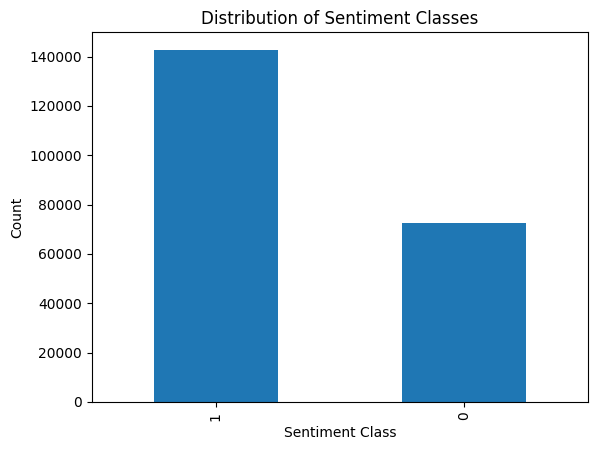

In [ ]:
class_counts = df5['sentiment'].value_counts()
class_counts.plot(kind='bar')
plt.title('Distribution of Sentiment Classes')
plt.xlabel('Sentiment Class')
plt.ylabel('Count')
plt.show()